<a href="https://colab.research.google.com/github/kg4-ken1ro/mypandas_tutorial_2/blob/main/study_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#グラフ描画ライブラリMatplotlib
#%matplotlib inlineを実行しておくとグラフがインラインで表示される。
%matplotlib inline
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv('drive/My Drive/train.csv')


In [ ]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Cabin"] = df_train["Cabin"].fillna(df_train["Cabin"].mode())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode())


In [ ]:
df_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df_train["Sex"] = df_train["Sex"].replace({"male": 0, "female": 1})
df_train = pd.get_dummies(df_train)

In [ ]:
train_y = df_train["Survived"]
train_x = df_train.drop("Survived", axis=1)


In [ ]:
clf = xgb.XGBClassifier()
clf.fit(train_x, train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.7822671156004489


<Axes: >

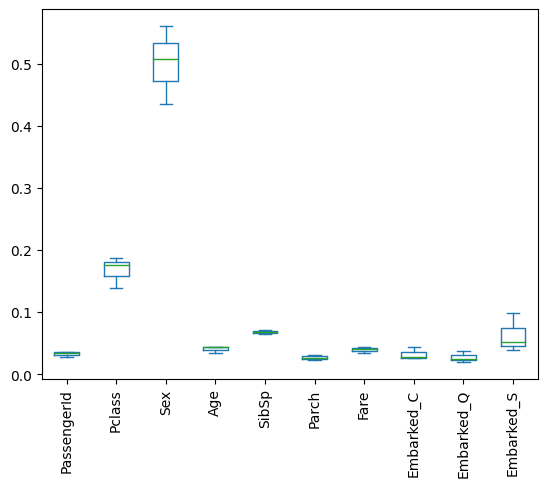

In [ ]:
accuracies = []
feature_importances = []

#変数の宣言
#random_state を固定しないと分割が変わり、結果が変わってしまう。
#random_stateはどの値でもよいので同じ値を使用すること。
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

#実際の分割
#分割のための変数が数字であるためiloc
#ilocはindexを指定することで特定の値を抽出できます。
#つまり、行、列を番号（数字が０のインデックス）で指定します。
for train_idx, test_idx in cv.split(train_x, train_y):
  trn_x = train_x.iloc[train_idx, :]
  val_x = train_x.iloc[test_idx, :]

  trn_y = train_y.iloc[train_idx]
  val_y = train_y.iloc[test_idx]

  clf = xgb.XGBClassifier()
  clf.fit(trn_x, trn_y)

  pred_y = clf.predict(val_x)
  accuracies.append(accuracy_score(val_y, pred_y))

  #特徴量の重要度を出力
  feature_importances.append(clf.feature_importances_)

print(np.mean(accuracies))

df_fimp = pd.DataFrame(feature_importances, columns=train_x.columns)

#pandasの箱ひげ図、plot.box()
df_fimp.plot(kind="box", rot=90)